### 아이디어
- 문제이름이 어지럽다
- DnC가 먼저 생각났다. `왼쪽으로 확장했을 때`와 `오른쪽으로 확장했을 때`를 기준으로 문제를 풀 수 있을 것이다.
  - Hard문제일 것
- 트리 입력을 그냥 직사각형의 관점으로 쭉 내리면 최대 부분합 문제로 바뀐다. 여기서 dfs라는 힌트를 얻을 수 있다.
  - 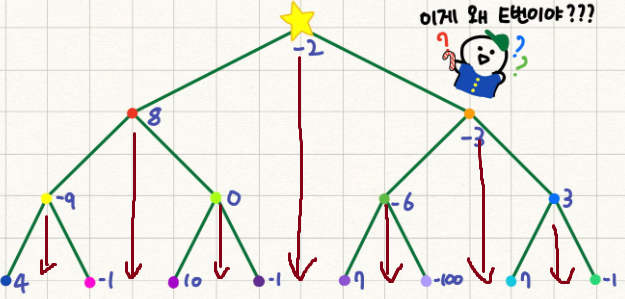
- 자꾸만 `최대 연속합 문제`를 푸는게 뭐였는지 까먹는다. 자꾸만 다른 풀이를 뒤적인다..
  - DP로 $O(N)$ 쯤에 풀 수 있던걸로 기억한다.
  - 쿼리가 여러개 나올 수 있는게 hard버전 일 것이다.
- 트리의 레벨 순회를 중위 순회로 바꿔야 한다.

- 당하고 말았다. 부모를 포함하지 않는 경우를 생각하지 못했다.
  - DP[k][i]: 트리를 $k$ 층까지 봤을 때 $i$번째 노드를 포함하는 최대 연속합
  - 안된다. 중간층만 살펴보는 경우를 고려하지 못한다.
  - 아니, 된다. 관점을 바꿔야했다.

### 풀이
- 트리의 높이가 $\log N$, 즉 매우 작다.
  - 높이의 상한선과 하한선의 값을 조합으로 지정해줄 수 있다.
- 조합론적 패턴을 방금 깨달았다.
  - $a \preceq b \mid a, b \in GN(k)$ 인 경우의 수를 세는 방법은 $k^2 \over 2$ 이다.
    - 구현적으론 $i = 1 \to k,\space j = i \to k$ 이렇게 순회하면 된다. 
      - 방금 발견하긴 한건데, 증명은.... 몰루?
    - 만약 $a, b$ 사이에 이항관계가 성립하지 않는다면 경우의 수는 $k^2$ 가 될것. 
      - 대충 상상하면 `a 부터 b` 까지 순서쌍의 조합을 만들건데, `b 부터 a`인 경우도 포함하는거니 2배가 될 것 같아서다. 
        - 순서관계가 성립하면 경우의 수가 절반이 된다.
      - 이것도 증명은 잘 몰루. 그냥 DP 를 이용한 완탐법이 이럴거 같은데.
- 한 step당 $\log^2 N \over 2$ 만큼 걸리므로 총 시간복잡도는 $O(N \log^2 N)$이다.

In [ ]:
# type: ignore
  def inorder(i, k) :
    nonlocal cnt
    if i * 2 <= N : inorder(2 * i, k + 1)
    Ti[i] = cnt
    Tk.append(k)
    T.append(L[i])
    cnt += 1
    if i * 2 + 1 <= N :inorder(2 * i + 1, k + 1)
  inorder(1, 0)

In [ ]:
# type: ignore
def inorder(i) :
  if i > N : return
  inorder(2 * i)
  print(L[i], end=' ')
  inorder(2 * i + 1)

- 비재귀 분석용

In [ ]:
# type: ignore
if all(v < 0 for v in L[1:]) : return print(max(L[1:])) #모두 음수인 경우. 하나 이상의 노드를 포함해야 한다.

- WA 한번. 문제 조건이 좀 더 있었다. 
  - 구현이 생소해서 디버깅이 오래걸리니 당연한 실수도 자꾸 한번씩 또 하게 되는 것 같다. 
  - 그러니 좌절할 필요도, 같은 실수를 반복할 필요도 없을 듯.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

NONE = -1
def sol() :
  N = int(input())
  L = [NONE] + list(map(int, input().split()))
  if all(v < 0 for v in L[1:]) : return print(max(L[1:])) #모두 음수인 경우. 하나 이상의 노드를 포함해야 한다.

  Ti= [NONE] * (N + 1) 
  Tk= [NONE]
  T = [NONE]

  cnt = 0
  S = [(1, 0)]
  vis = [False] * (N + 1) #순회 순서를 바꾸기 위해선 결국 필수다..
  cnt = 0
  while S :
    i, k = S.pop()
    if i > N : continue
    
    if not vis[i] :
      vis[i] = True
      S.append((i, k))
      S.append((2 * i, k + 1))
      continue
    
    Ti[i] = cnt
    Tk.append(k)
    T.append(L[i])
    cnt += 1
    S.append((2 * i + 1, k + 1))

  hans = 0
  for a in range(20) :
    for b in range(a, 20) :
      DP = res = 0
      for v, k in zip(T, Tk) : #정보: 에이펙스 레전드의 TTK는 평균 0.6초이다
        if k < a or k > b : continue
        DP = max(0, DP + v)
        res = max(res, DP)
      hans = max(hans, res)
  
  print(hans)

sol()

- 뭔가 발상은 쉬운데 구현이 겁내 어려웠다.

In [ ]:
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

NONE = -1
def sol() :
  N = int(input())
  L = [NONE] + list(map(int, input().split()))
  Th= [NONE]
  T = [NONE]
  S = [(1, 0)]
  vis = [False] * (N + 1) #순회 순서를 바꾸기 위해선 결국 필수
  while S :
    i, h = S.pop()
    if i > N : continue
    
    if not vis[i] :
      vis[i] = True
      S.append((i, h))
      S.append((2 * i, h + 1))
      continue
    
    Th.append(h)
    T.append(L[i])
    S.append((2 * i + 1, h + 1))

  ans = 0
  hans = -7777777777
  K = N.bit_length() + 1
  for a in range(K) :
    for b in range(a, K) :
      DP = 0
      for v, h in zip(T, Th) : #정보: 에이펙스 레전드의 TTK는 평균 0.6초이다
        if not (a <= h <= b) : continue
        hans = max(hans, v)
        DP = max(0, DP + v)
        ans = max(ans, DP)
  
  if hans < 0 : return print(hans) #한스는 신이다
  print(ans)

sol()